In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('gene_high_throughput_sequencing.csv')

In [4]:
data.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


In [5]:
data.describe()

,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,AGRN,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2.463922,7.100958,19.056151,15.618688,23.537120,11.303466,8.921396,63.270147,53.906324,70.678573,...,5.563444,2.192029,1.967424,2.181360,1.729308,1.980733,16.834075,1.825827,2.287380,1.756827
std,1.413687,4.164703,9.287753,4.664146,4.475294,4.055122,3.270713,13.792140,45.635498,21.326237,...,2.389789,2.454218,2.047129,2.542652,1.507149,2.230157,7.126802,1.902716,3.185571,1.623151
min,0.833898,1.231043,4.941211,6.395270,8.520713,2.066576,1.364917,42.544976,24.616767,42.631422,...,1.144240,0.853957,0.853957,0.853957,0.833898,0.833898,4.675683,0.833898,0.853957,0.833898
25%,1.284642,3.892403,13.423946,12.574596,21.151624,8.712898,6.213396,53.093627,34.009687,54.202100,...,3.805875,1.042783,1.011350,1.011350,1.003337,1.003337,11.186633,1.003337,1.011350,1.003337
50%,2.104677,6.315551,16.734855,14.586150,23.477006,11.172590,8.703397,63.230911,39.554954,65.510651,...,5.617824,1.339507,1.273861,1.298543,1.252527,1.252527,16.514389,1.252527,1.273861,1.252527
75%,3.345067,8.916399,21.884325,17.695678,26.471909,13.568625,11.139240,69.880705,50.295756,79.427207,...,7.100942,1.815754,1.647255,1.677971,1.625364,1.611299,21.849385,1.607345,1.647255,1.611299
max,7.364879,20.006038,60.584449,29.659104,34.110743,27.441093,17.121366,132.144503,327.590426,128.606260,...,11.227770,11.913855,10.883310,11.692697,10.392539,10.640754,49.295538,9.919132,17.278985,9.333904


## Часть 1. Применение t-критерия Стьюдента

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

Построим QQ-PLOTs для первого гена в таблице.

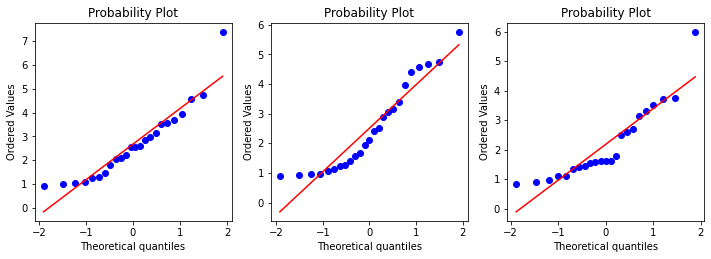

In [6]:
pylab.figure(figsize=(12,8))

pylab.subplot(2,3,1)
stats.probplot(data.LOC643837[data.Diagnosis == 'normal'], dist="norm", plot=pylab)
pylab.subplot(2,3,2)
stats.probplot(data.LOC643837[data.Diagnosis == 'early neoplasia'], dist="norm", plot=pylab)
pylab.subplot(2,3,3)
stats.probplot(data.LOC643837[data.Diagnosis == 'cancer'], dist="norm", plot=pylab)
pylab.show()

А теперь проверим нормальность распределений с помощью Критерия Шапиро-Уилка:

 $H_0\colon$ распределение активности гена в выборке - нормальное.
 
 $H_1\colon$ не нормально.

normal

In [7]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.LOC643837[data.Diagnosis == 'normal']))

Shapiro-Wilk normality test, W-statistic: 0.895629, p-value: 0.017408


early neoplasia

In [8]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % 
      stats.shapiro(data.LOC643837[data.Diagnosis == 'early neoplasia']))

Shapiro-Wilk normality test, W-statistic: 0.897122, p-value: 0.015890


cancer

In [9]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % 
      stats.shapiro(data.LOC643837[data.Diagnosis == 'cancer']))

Shapiro-Wilk normality test, W-statistic: 0.853136, p-value: 0.003103


Для каждого гена применим t-критерий Стьюдента для проверки равенства средних в двух независимых выборках.

Критерий Стьюдента:

$H_0\colon$ средние значения активности гена для пациентов без рака груди и пациентов с ранним обнаружением паталогии (пациентов с ранним обнаружением паталогии и больных раком) одинаковы.

$H_1\colon$ не одинаковы.

In [10]:
from scipy.stats import ttest_ind

In [11]:
pvalues = []

for column in data.columns[2:]:
    pvalues.append([ttest_ind(data[column][data.Diagnosis == 'normal'], 
                              data[column][data.Diagnosis == 'early neoplasia'],
                              equal_var = False).pvalue,
                    ttest_ind(data[column][data.Diagnosis == 'early neoplasia'], 
                              data[column][data.Diagnosis == 'cancer'],
                              equal_var = False).pvalue])

In [12]:
pvalues_df = pd.DataFrame.from_records(pvalues, columns = ['normal & early neoplasia', 'early neoplasia & cancer'],
                                       index = data.columns[2:])

In [13]:
pvalues_df

,normal & early neoplasia,early neoplasia & cancer
LOC643837,0.690766,0.413735
LOC100130417,0.000032,0.653429
SAMD11,0.060273,0.079556
NOC2L,0.826429,0.287581
KLHL17,0.049876,0.463292
...,...,...
DDX3Y,0.640904,0.659369
CD24,0.830134,0.330617
CYorf15B,0.670395,0.542939
KDM5D,0.793925,0.565753


In [14]:
answer11 = pvalues_df[pvalues_df['normal & early neoplasia'] <= 0.05].shape[0]
answer12 = pvalues_df[pvalues_df['early neoplasia & cancer'] <= 0.05].shape[0]

In [15]:
with open('answer11.txt', 'w') as fout:
    fout.write(str(answer11))

In [16]:
with open('answer12.txt', 'w') as fout:
    fout.write(str(answer12))

## Часть 2: поправка методом Холма

In [17]:
import statsmodels.stats.multitest as smm

In [18]:
reject_1, p_corrected_1, a1, a2 = smm.multipletests(pvalues_df['normal & early neoplasia'], 
                                            alpha = 0.05 / 2, 
                                            method = 'holm') 

In [19]:
reject_2, p_corrected_2, a1, a2 = smm.multipletests(pvalues_df['early neoplasia & cancer'], 
                                            alpha = 0.05 / 2, 
                                            method = 'holm') 

In [20]:
reject_df = pd.DataFrame.from_records((reject_1, reject_2),
                                       index = ['normal & early neoplasia', 'early neoplasia & cancer'],
                                       columns = data.columns[2:])

In [21]:
fc_list_ne = []
fc_list_ec = []

for column in reject_df.columns:
    if reject_df[column][0] == True:
        C = data[column][data.Diagnosis == 'normal'].mean()
        T = data[column][data.Diagnosis == 'early neoplasia'].mean()
        if T > C:
            fc_list_ne.append(T / C)
        else:
            fc_list_ne.append(- C / T)
    if reject_df[column][1] == True:
        C = data[column][data.Diagnosis == 'early neoplasia'].mean()
        T = data[column][data.Diagnosis == 'cancer'].mean()
        if T > C:
            fc_list_ec.append(T / C)
        else:
            fc_list_ec.append(- C / T)

In [22]:
answer21 = len([fc for fc in fc_list_ne if abs(fc) > 1.5])
answer22 = len([fc for fc in fc_list_ec if abs(fc) > 1.5])

In [23]:
with open('answer21.txt', 'w') as fout:
    fout.write(str(answer21))

In [24]:
with open('answer22.txt', 'w') as fout:
    fout.write(str(answer22))

## Часть 3: поправка методом Бенджамини-Хохберга

In [25]:
reject_1, p_corrected_1, a1, a2 = smm.multipletests(pvalues_df['normal & early neoplasia'], 
                                            alpha = 0.05 / 2, 
                                            method = 'fdr_bh') 

In [26]:
reject_2, p_corrected_2, a1, a2 = smm.multipletests(pvalues_df['early neoplasia & cancer'], 
                                            alpha = 0.05 / 2, 
                                            method = 'fdr_bh') 

In [27]:
reject_df = pd.DataFrame.from_records((reject_1, reject_2),
                                       index = ['normal & early neoplasia', 'early neoplasia & cancer'],
                                       columns = data.columns[2:])

In [28]:
fc_list_ne = []
fc_list_ec = []

for column in reject_df.columns:
    if reject_df[column][0] == True:
        C = data[column][data.Diagnosis == 'normal'].mean()
        T = data[column][data.Diagnosis == 'early neoplasia'].mean()
        if T > C:
            fc_list_ne.append(T / C)
        else:
            fc_list_ne.append(- C / T)
    if reject_df[column][1] == True:
        C = data[column][data.Diagnosis == 'early neoplasia'].mean()
        T = data[column][data.Diagnosis == 'cancer'].mean()
        if T > C:
            fc_list_ec.append(T / C)
        else:
            fc_list_ec.append(- C / T)

In [29]:
answer31 = len([fc for fc in fc_list_ne if abs(fc) > 1.5])
answer32 = len([fc for fc in fc_list_ec if abs(fc) > 1.5])

In [30]:
with open('answer31.txt', 'w') as fout:
    fout.write(str(answer31))

In [31]:
with open('answer32.txt', 'w') as fout:
    fout.write(str(answer32))